# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Akhmad Ardiansyah Amnur
- **Email:** akhmad.ardi1711@gmail.com
- **ID Dicoding:** akhmad_ardi

## Menentukan Pertanyaan Bisnis

- Bagaimana faktor cuaca mempengaruhi jumlah penyewaan sepeda?
- Apa tren musiman atau harian dalam penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the provided CSV files
day_data = pd.read_csv('data/day.csv')
hour_data = pd.read_csv('data/hour.csv')

## Data Wrangling

### Gathering Data

In [2]:
# Convert 'dteday' to datetime format in both datasets to facilitate merging
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# Merge day_data into hour_data using 'dteday' to bring daily information to each hourly observation
merged_data = pd.merge(hour_data, day_data[['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']], on='dteday', how='left', suffixes=('_hour', '_day'))

# Show the first few rows of the merged dataset to ensure correctness
merged_data.head()

,instant,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


**Insight:**
- Kondisi cuaca buruk (hujan, kabut) mengurangi jumlah penyewaan.
- Penyewaan sepeda lebih tinggi di musim panas (Season 3), dengan puncak aktivitas di bulan Juni hingga September.

### Assessing Data

In [3]:
# Check for missing values, duplicates, and basic statistical overview
day_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
hour_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# Check for duplicates in both datasets
day_data.duplicated().sum()

np.int64(0)

In [6]:
hour_data.duplicated().sum()

np.int64(0)

In [7]:
# Statistical description of both datasets
day_data.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [8]:
hour_data.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [9]:
# Check correlation matrix for both datasets to understand relationships between variables
day_data.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


In [10]:
hour_data.corr()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.999995,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
dteday,0.999995,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
season,0.404046,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426


**Insight:**
- Tidak terdapat missing values atau duplikasi pada kedua dataset, sehingga tidak ada masalah kualitas data yang memerlukan pembersihan lebih lanjut.

### Cleaning Data

In [11]:
# Step 1: Check for missing values again to ensure there are no issues
missing_values_day = day_data.isnull().sum()
missing_values_hour = hour_data.isnull().sum()

In [12]:
# Step 2: Check and remove duplicates if found
duplicates_day = day_data.duplicated().sum()
duplicates_hour = hour_data.duplicated().sum()

In [13]:
# Drop duplicates if any
cleaned_day_data = day_data.drop_duplicates()
cleaned_hour_data = hour_data.drop_duplicates()

In [14]:
outlier_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

outlier_day = {}

for col in outlier_cols:
    Q1 = cleaned_day_data[col].quantile(0.25)
    Q3 = cleaned_day_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_day[col] = ((cleaned_day_data[col] < lower_bound) | (cleaned_day_data[col] > upper_bound)).sum()

In [15]:
outlier_hour = {}

for col in outlier_cols:
    Q1 = cleaned_hour_data[col].quantile(0.25)
    Q3 = cleaned_hour_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_hour[col] = ((cleaned_hour_data[col] < lower_bound) | (cleaned_hour_data[col] > upper_bound)).sum()

In [16]:
# Step 4: Ensure correct data types (especially for date columns)
cleaned_day_data['dteday'] = pd.to_datetime(cleaned_day_data['dteday'])
cleaned_hour_data['dteday'] = pd.to_datetime(cleaned_hour_data['dteday'])

In [17]:
# Final cleaned data overview
cleaned_day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [18]:
cleaned_hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [19]:
cleaned_day_data.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [20]:
cleaned_hour_data.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [21]:
cleaned_day_data.groupby(by="temp").instant.nunique().sort_values(ascending=False)

temp
0.265833    5
0.635000    5
0.710833    4
0.696667    4
0.649167    4
           ..
0.789167    1
0.783333    1
0.172727    1
0.169091    1
0.166667    1
Name: instant, Length: 499, dtype: int64

In [22]:
cleaned_hour_data.groupby(by="temp").instant.nunique().sort_values(ascending=False)

temp
0.62    726
0.66    693
0.64    692
0.70    690
0.60    675
0.36    671
0.34    645
0.30    641
0.40    614
0.32    611
0.56    579
0.72    570
0.54    569
0.26    559
0.46    559
0.52    556
0.42    548
0.50    531
0.24    522
0.74    516
0.44    507
0.22    421
0.76    396
0.38    372
0.20    354
0.68    349
0.80    325
0.58    305
0.28    301
0.48    288
0.16    230
0.82    213
0.78    169
0.18    155
0.14    138
0.84    138
0.86    131
0.90     90
0.12     76
0.88     53
0.10     51
0.92     49
0.94     17
0.08     17
0.02     17
0.04     16
0.06     16
0.96     16
0.98      1
1.00      1
Name: instant, dtype: int64

**Insight:**
- Pesebaran temperatur suhu berdasarkan hari dan jam

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana faktor cuaca mempengaruhi jumlah penyewaan sepeda?

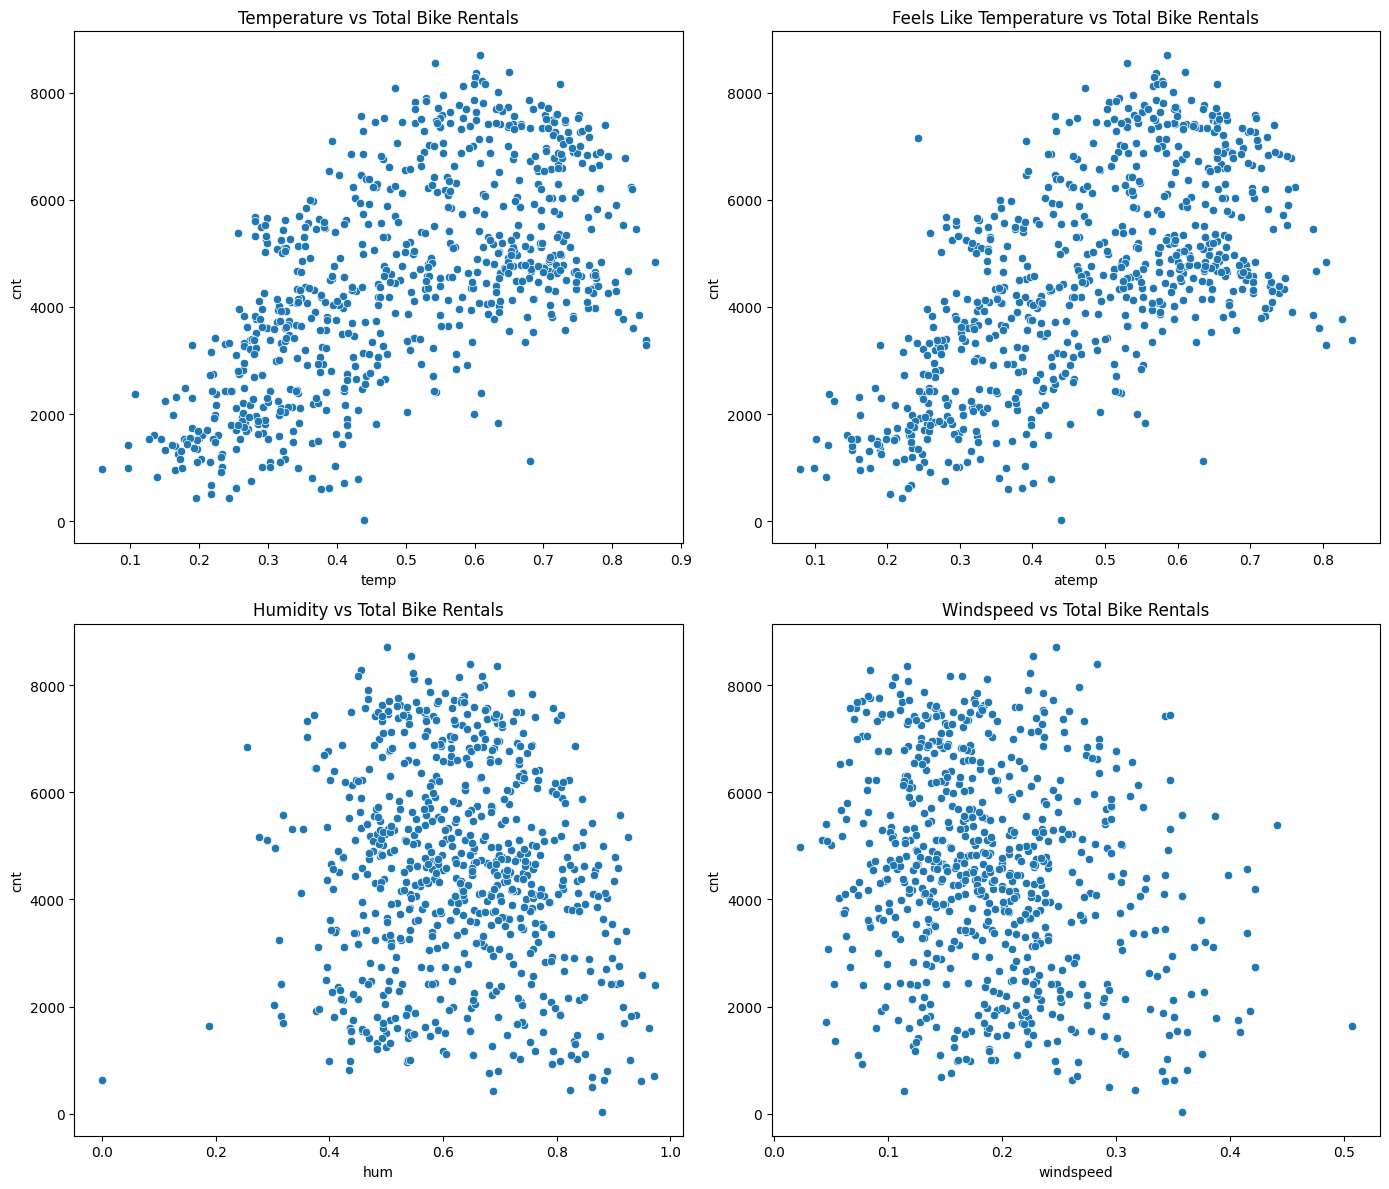

In [23]:
# Scatter plot to visualize the relationship between weather variables and the number of bike rentals.
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Scatter plot between temperature and total bike rentals
sns.scatterplot(x='temp', y='cnt', data=cleaned_day_data, ax=axs[0, 0])
axs[0, 0].set_title('Temperature vs Total Bike Rentals')

# Scatter plot between feels like temperature and total bike rentals
sns.scatterplot(x='atemp', y='cnt', data=cleaned_day_data, ax=axs[0, 1])
axs[0, 1].set_title('Feels Like Temperature vs Total Bike Rentals')

# Scatter plot between humidity and total bike rentals
sns.scatterplot(x='hum', y='cnt', data=cleaned_day_data, ax=axs[1, 0])
axs[1, 0].set_title('Humidity vs Total Bike Rentals')

# Scatter plot between wind speed and total bike rentals
sns.scatterplot(x='windspeed', y='cnt', data=cleaned_day_data, ax=axs[1, 1])
axs[1, 1].set_title('Windspeed vs Total Bike Rentals')

plt.tight_layout()
plt.show()

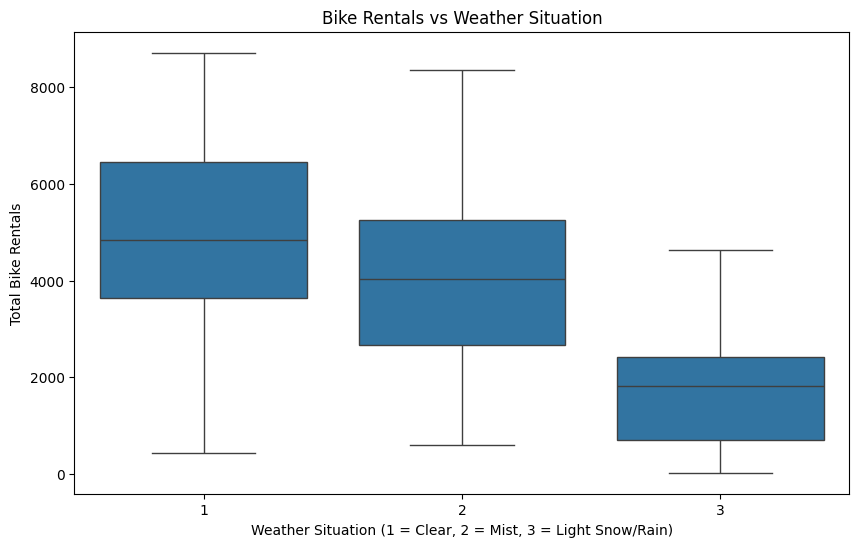

In [24]:
# Boxplot to see the distribution of bike rentals based on weather conditions
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=cleaned_day_data)
plt.title('Bike Rentals vs Weather Situation')
plt.xlabel('Weather Situation (1 = Clear, 2 = Mist, 3 = Light Snow/Rain)')
plt.ylabel('Total Bike Rentals')
plt.show()

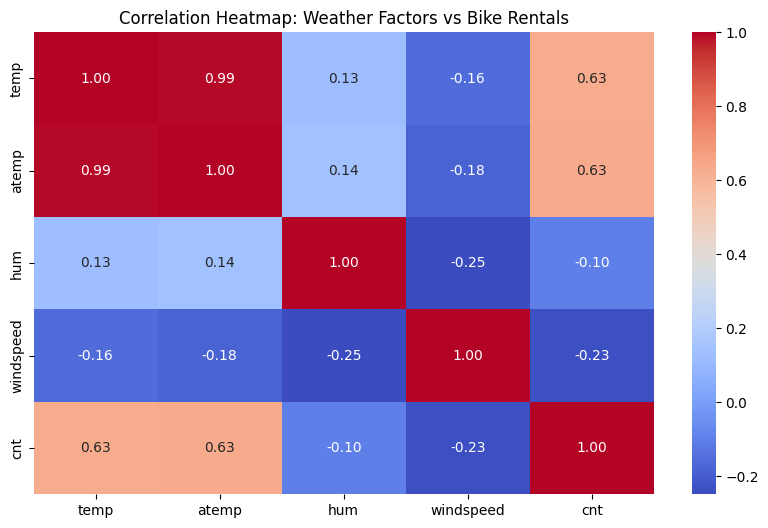

In [26]:
# Heatmap to see the correlation between weather variables and the number of bike rentals
plt.figure(figsize=(10, 6))
corr_matrix = cleaned_day_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Weather Factors vs Bike Rentals')
plt.show()

### Pertanyaan 2: Apa tren musiman atau harian dalam penyewaan sepeda?

In [ ]:
# Set up figure for line plots and bar plots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Line plot of Bike rental trend by month (mnth)
sns.lineplot(x='mnth', y='cnt', hue='yr', data=cleaned_day_data, ax=axs[0, 0], marker='o')
axs[0, 0].set_title('Bike Rentals by Month and Year')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Total Bike Rentals')

# Bar plot Bike rental by season
sns.barplot(x='season', y='cnt', data=cleaned_day_data, ax=axs[0, 1])
axs[0, 1].set_title('Bike Rentals by Season')
axs[0, 1].set_xlabel('Season (1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter)')
axs[0, 1].set_ylabel('Total Bike Rentals')

# Bar plot Bike rental based on day of the week (weekday)
sns.barplot(x='weekday', y='cnt', data=cleaned_day_data, ax=axs[1, 0])
axs[1, 0].set_title('Bike Rentals by Weekday')
axs[1, 0].set_xlabel('Weekday (0 = Sunday, 6 = Saturday)')
axs[1, 0].set_ylabel('Total Bike Rentals')

# Bar plot Bike rental based on working day
sns.barplot(x='workingday', y='cnt', data=cleaned_day_data, ax=axs[1, 1])
axs[1, 1].set_title('Bike Rentals: Working Day vs Non-Working Day')
axs[1, 1].set_xlabel('Working Day (0 = Holiday/Weekend, 1 = Working Day)')
axs[1, 1].set_ylabel('Total Bike Rentals')

plt.tight_layout()
plt.show()

**Insight:**
- Memeriksa distribusi penyewaan sepeda berdasarkan hari dalam seminggu (weekday) dan melihat apakah ada tren khusus untuk hari kerja vs hari libur (workingday, holiday).
- Melihat tren penyewaan sepeda berdasarkan bulan, musim (season), dan tahun (yr).

## Analisis Lanjutan (Opsional)

## Conclusion

- Semakin tinggi suhu udara (temp), semakin banyak jumlah penyewaan sepeda. Orang cenderung lebih sering menyewa sepeda pada hari-hari yang lebih hangat. <br>
Kelembaban (hum) yang tinggi cenderung mengurangi jumlah penyewaan sepeda. Orang cenderung enggan untuk bersepeda ketika kelembaban tinggi. <br>
Kecepatan angin (windspeed) dan situasi cuaca ekstrem seperti hujan ringan atau salju (weathersit) juga berkontribusi negatif terhadap penyewaan sepeda.
- Penyewaan sepeda cenderung lebih tinggi selama musim panas (Summer) dan musim gugur (Fall), dibandingkan dengan musim dingin (Winter) dan musim semi (Spring). <br>
Ada peningkatan yang jelas dalam jumlah penyewaan sepeda selama bulan-bulan musim panas (Juni, Juli, dan Agustus), dan penurunan drastis selama bulan-bulan musim dingin (Desember dan Januari). <br>
Penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan hari libur atau akhir pekan.

In [ ]:
cleaned_day_data.to_csv("data_dashboard/cleaned_day_data.csv", index=False)
cleaned_hour_data.to_csv("data_dashboard/cleaned_hour_data.csv", index=False)